<a href="https://colab.research.google.com/github/mmstfkc/Deep-Learning/blob/main/CNN_detailed_review_and_asking_the_photos_we_want.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let's download the data set first

In [1]:
from keras.datasets import cifar10
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


50000 photos in 32x32 size

In [3]:
x_train.shape

(50000, 32, 32, 3)

Let's see the matrix values of the first picture

In [4]:
index = 0
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

Well, if we want to see the picture, this is the process we will do.

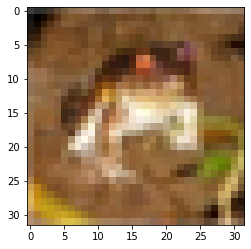

In [5]:
import matplotlib.pyplot as plt
img = plt.imshow(x_train[index])

Well, if we want to see the picture label name, this is the process we will do. But...

In [6]:
print("The image label is",y_train[index])

The image label is [6]


printed a number instead of the name and this number represents one of the 10 items, and these items are these

In [7]:
classification = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
print("The image label is",classification[y_train[index][0]])

The image label is frog


This is actually what is done with to_categorical
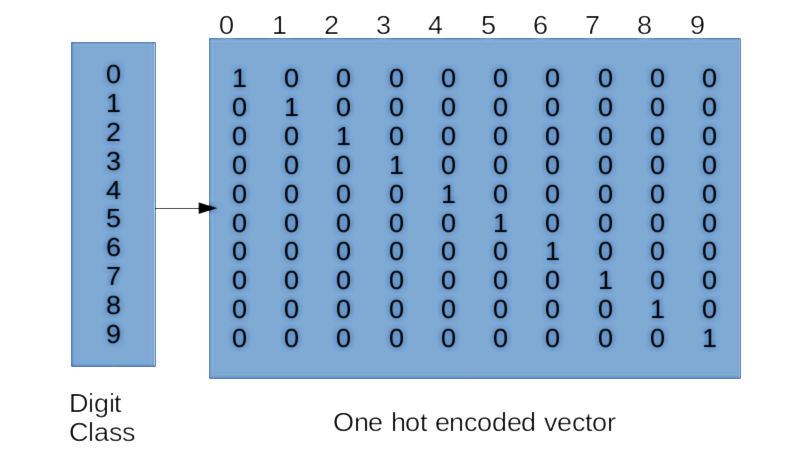

In [10]:
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)
print(f"{y_train_one_hot[index]} ,  {y_train[index]}")

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] ,  [6]


Let's examine the x_train part now

In [11]:
x_train[index]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

we need to optimize our dataset with values between 0 and 1

In [12]:
x_train = x_train / 255
x_test = x_test / 255

In [13]:
x_train[index]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

Let's start building our model

In [16]:
from keras import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
model = Sequential()
model.add(Conv2D(32,(5,5), activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(1000,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(250,activation='relu'))
model.add(Dense(10,activation='softmax'))

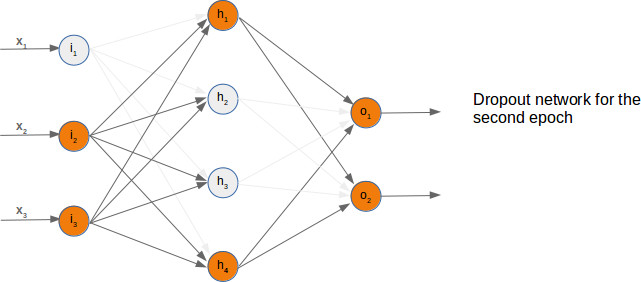

Let's compile the model

In [17]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Let's train the model

In [18]:
hist = model.fit(x_train,y_train_one_hot,
                 batch_size = 256,
                 epochs = 10,
                 validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 60s 375ms/step - loss: 2.0013 - accuracy: 0.2506 - val_loss: 1.5162 - val_accuracy: 0.4397
Epoch 2/10
157/157 [==============================] - 59s 376ms/step - loss: 1.4421 - accuracy: 0.4671 - val_loss: 1.2873 - val_accuracy: 0.5320
Epoch 3/10
157/157 [==============================] - 59s 377ms/step - loss: 1.2799 - accuracy: 0.5343 - val_loss: 1.2460 - val_accuracy: 0.5571
Epoch 4/10
157/157 [==============================] - 59s 375ms/step - loss: 1.1766 - accuracy: 0.5826 - val_loss: 1.1565 - val_accuracy: 0.5907
Epoch 5/10
157/157 [==============================] - 59s 374ms/step - loss: 1.0795 - accuracy: 0.6122 - val_loss: 1.0620 - val_accuracy: 0.6217
Epoch 6/10
157/157 [==============================] - 59s 375ms/step - loss: 0.9980 - accuracy: 0.6460 - val_loss: 1.0507 - val_accuracy: 0.6225
Epoch 7/10
157/157 [==============================] - 59s 375ms/step - loss: 0.9333 - accuracy: 0.6721 - val_loss: 1.0508 - val_ac

Let's look at our training success

In [19]:
model.evaluate(x_test,y_test_one_hot)[1]

313/313 [==============================] - 5s 16ms/step - loss: 0.9385 - accuracy: 0.6770


0.6769999861717224

Let's draw the success and loss graph of our model

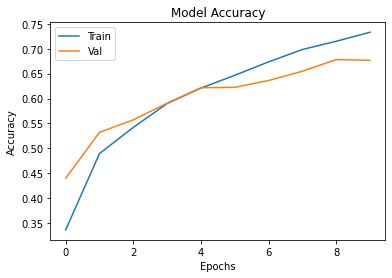

In [20]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel("Accuracy")
plt.xlabel('Epochs')
plt.legend(['Train','Val'],loc='upper left')
plt.show()

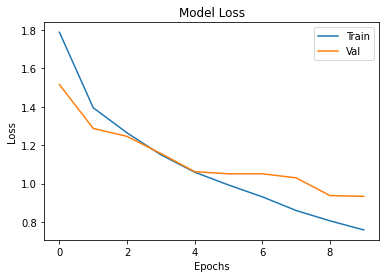

In [21]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel("Loss")
plt.xlabel('Epochs')
plt.legend(['Train','Val'],loc='upper right')
plt.show()

In [25]:
from google.colab import files
uploaded = files.upload()

Saving cat.jpg to cat.jpg


let's see our picture

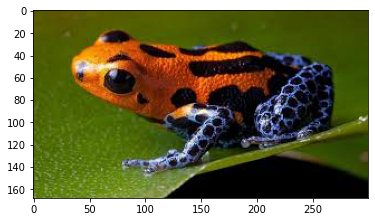

In [34]:
new_image = plt.imread('frog.jpg')
img = plt.imshow(new_image)

Let's bring our picture to the appropriate format and examine it again.

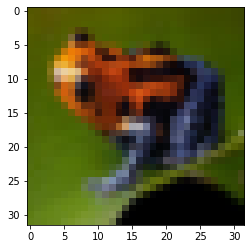

In [35]:
from skimage.transform import resize
resized_image = resize(new_image,(32,32,3))
img = plt.imshow(resized_image)

Let's ask our model what this is and examine the ratios it gives.

In [36]:
import numpy as np
predictions = model.predict(np.array([resized_image]))
predictions

array([[0.01122936, 0.04793067, 0.06966399, 0.03696241, 0.2292278 ,
        0.08217064, 0.43656552, 0.05009768, 0.00245265, 0.03369934]],
      dtype=float32)

Let's write a simple bubble sort algorithm to sort from most similar to least similar

In [37]:
list_index = [0,1,2,3,4,5,6,7,8,9]
x = predictions
for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp
# benzeme listesi
print(list_index) 

[6, 4, 5, 2, 7, 1, 3, 9, 0, 8]


Let's print what they are like and the ratio

In [38]:
for i in range(5):
  print(classification[list_index[i]], ":",round(predictions[0][list_index[i]]*100,2),"%" )

frog : 43.66 %
deer : 22.92 %
dog : 8.22 %
bird : 6.97 %
horse : 5.01 %
